# **Importing dataset**


In [ ]:

from google.colab import files
uploaded = files.upload()

100%|██████████| 1.86M/1.86M [00:00<00:00, 2.43MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bilaliqbalai/spam-ham-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/bilaliqbalai/spam-ham-dataset/versions/1


spam_dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv()
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# **Text Preprocessing**

1.  A custom function clean_text is defined to clean text by removing non-alphabetic characters, converting text to lowercase, and removing stopwords.
2.   The cleaning function is applied to each text in the dataset.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
texts = df['text'].values
print(texts)

["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."
 'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'
 "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers con

In [ ]:
labels = df['label'].values
print(labels)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


# **Splitting Dataset into Features and Labels**

The dataset is split into training and testing sets using train_test_split.



In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(df['label'])


In [ ]:
df

,Unnamed: 0,label,text,label_num,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter follow note gave ...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january see attached file hpln...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian springs deal book teco pvr reve...
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,subject put ft transport volumes decreased con...
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,subject following noms hpl take extra mmcf wee...
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,subject calpine daily gas nomination julie men...
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,subject industrial worksheets august activity ...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], labels, test_size=0.2, random_state=42)


# **Tokenization and Padding**

*   The texts are converted into sequences of integers and padded to ensure uniform length.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_len)


In [ ]:
X_test_seq

[[2, 9, 49, 84, 28, 32, 69, 329, 36, 329, 36],
 [2,
  168,
  626,
  626,
  101,
  539,
  3382,
  432,
  295,
  1751,
  3093,
  2495,
  345,
  1716,
  254,
  4290,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,
  1760,
  4290,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,
  1760,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,
  1760,
  4290,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,
  1760,
  4111,
  166,
  253,
  1760,
  4290,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,
  1760,
  2626,
  3388,
  659,
  732,
  3547,
  1230,
  3215,
  1326,
  4025,
  3946,
  2767,
  2000,
  2772,
  4111,
  166,
  253,

# **Building the CNN Model**
A sequential model is built using the following layers:
1.Embedding layer for word embeddings.

2.Two Conv1D layers for feature extraction.

3.GlobalMaxPooling1D for dimensionality reduction.

4.Dense layer with ReLU activation.

5.Dropout layer for regularization.

6.Final output layer with a sigmoid activation for binary classification.

In [ ]:

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_seq_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Training the Model**

In [ ]:
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.7739 - loss: 0.4185 - val_accuracy: 0.9594 - val_loss: 0.1023
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.9643 - val_loss: 0.0909
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9948 - loss: 0.0180 - val_accuracy: 0.9720 - val_loss: 0.1047
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.9681 - val_loss: 0.1371
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9671 - val_loss: 0.1362
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.9700 - val_loss: 0.1564
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9700 - val_loss: 0.1686
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.9999 - loss: 7.7674e-

# **Plotting Accuracy and Loss Curves**

* The training and validation accuracy and loss are plotted over the number of epochs.

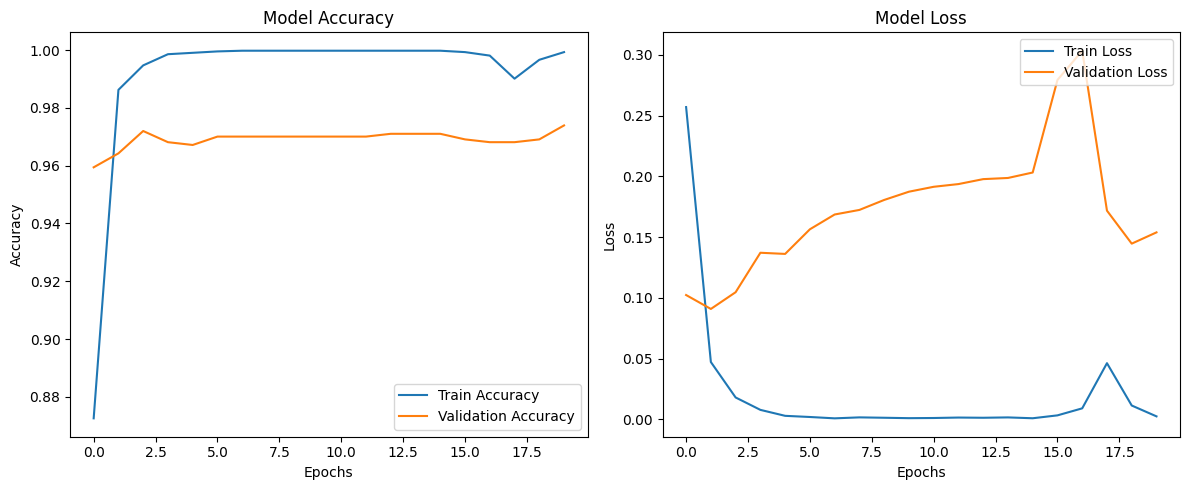

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **Confusion Matrix and Classification Report**

1.  Confusion Matrix: The confusion matrix is generated to visualize the model's performance on the test set.
2.   Classification Report: Precision, recall, and F1-score are printed for a more detailed evaluation of model performance.


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


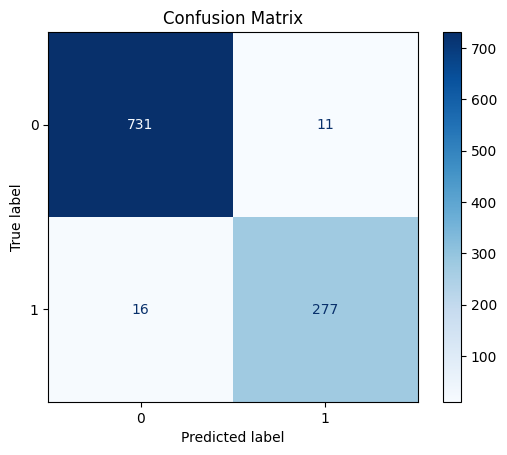

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test_pad)
y_pred_classes = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


# **Prediction on New Emails**

In [ ]:

test_emails = [
    "Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!",
    "Get rich quick! Earn $500 a day working from home with this secret system. Sign up now!",
    "URGENT: Your account has been compromised. Please verify your personal information to avoid suspension.",
    "Hi John, I wanted to remind you about the meeting tomorrow at 10 AM. Let me know if you need anything. Thanks!",
    "Dear customer, your recent order has been shipped and will be delivered within 3-5 business days. Thank you for shopping with us!",
    "Hey, can you send me the presentation slides from last week’s meeting? I need to review them before the next discussion."
]


test_emails_cleaned = [clean_text(email) for email in test_emails]

test_seq = tokenizer.texts_to_sequences(test_emails_cleaned)
test_pad = pad_sequences(test_seq, maxlen=max_seq_len)

predictions = model.predict(test_pad)

for i, email in enumerate(test_emails):
    print(f"Email: {email}")
    print(f"Prediction: {'Spam' if predictions[i] > 0.5 else 'Ham'}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Email: Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!
Prediction: Spam

Email: Get rich quick! Earn $500 a day working from home with this secret system. Sign up now!
Prediction: Spam

Email: URGENT: Your account has been compromised. Please verify your personal information to avoid suspension.
Prediction: Spam

Email: Hi John, I wanted to remind you about the meeting tomorrow at 10 AM. Let me know if you need anything. Thanks!
Prediction: Ham

Email: Dear customer, your recent order has been shipped and will be delivered within 3-5 business days. Thank you for shopping with us!
Prediction: Spam

Email: Hey, can you send me the presentation slides from last week’s meeting? I need to review them before the next discussion.
Prediction: Spam

